## Preliminaries

In [47]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, auc

## Recipient Only

### Data Preprocessing

In [48]:
# Load in dataframe
df = pd.read_csv("/Users/stevenswee/Desktop/BE M227/Processed_Data/encoded_recipient_df.csv")

# Get all but first column
df = df.iloc[:, 1:]

### Model (All Features)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       348
           1       0.00      0.00      0.00       123

    accuracy                           0.74       471
   macro avg       0.37      0.50      0.42       471
weighted avg       0.55      0.74      0.63       471



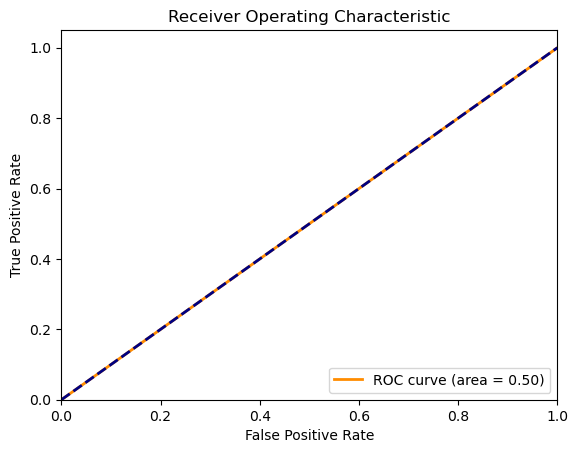

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]


In [49]:
# Features and Output
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l1', solver = 'saga', max_iter = 10000, n_jobs = -1, random_state = 42).fit(X_train, y_train)

# Get classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0.0))

# AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print(clf.coef_)

### Model (Backwards Selected Features)

Note: Backwards selected features were found using the MASS library 

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       348
           1       0.00      0.00      0.00       123

    accuracy                           0.74       471
   macro avg       0.37      0.50      0.42       471
weighted avg       0.55      0.74      0.63       471



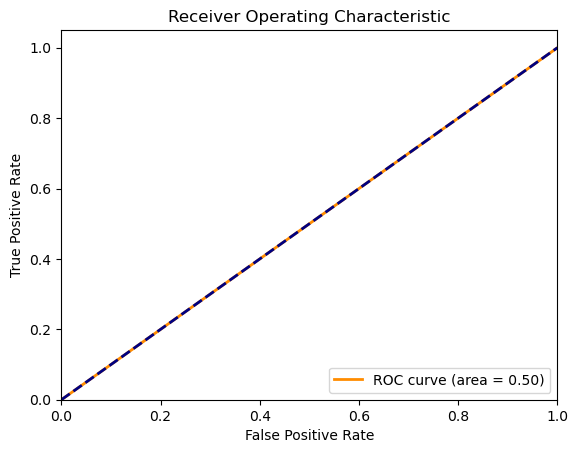

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [26]:
# Select features
df_backwards = df[df.columns[[2, 7, 9, 14, 18, 20, 21, 23, 27, 28, 29, 30, 32, 38, 40, 46, 53, 54, 56]]]

# Features and Output
X = df_backwards.iloc[:, :-1]
y = df_backwards.iloc[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l1', solver = 'saga', max_iter = 10000, random_state = 42).fit(X_train, y_train)

# Get classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0.0))

# AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print(clf.coef_)

### Model (Non-Lab Features)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       348
           1       0.00      0.00      0.00       123

    accuracy                           0.74       471
   macro avg       0.37      0.50      0.42       471
weighted avg       0.55      0.74      0.63       471



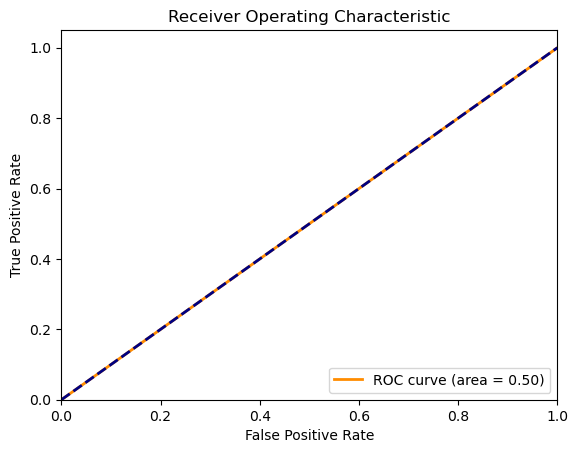

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [27]:
# Get non-lab features
df_nonlab = df.iloc[:, :23]

# Features and Output
X = df_nonlab
y = df.iloc[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l1', solver = 'saga', max_iter = 10000, random_state = 42).fit(X_train, y_train)

# Get classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0.0))

# AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print(clf.coef_)


### Model (Lab Features)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       348
           1       0.00      0.00      0.00       123

    accuracy                           0.74       471
   macro avg       0.37      0.50      0.42       471
weighted avg       0.55      0.74      0.63       471



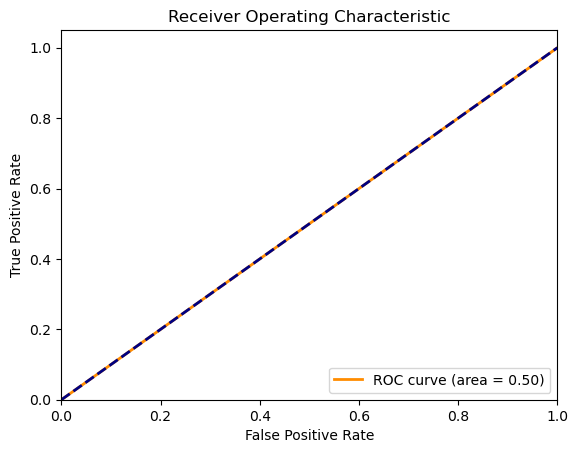

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]


In [28]:
# Get lab features
df_lab = df.iloc[:, 24:]

# Features and Output
X = df_lab.iloc[:, :-1]
y = df_lab.iloc[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l1', solver = 'saga', max_iter = 10000, random_state = 42).fit(X_train, y_train)

# Get classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0.0))

# AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print(clf.coef_)


### Feature by feature

In [29]:
# Features and Output
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Get list of input features
features = X.columns
kept_features = []

# Filter for features that have some predictive power (i.e. AUC > 0.5)
for feature in features:
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X[[feature]], y, test_size=0.2, random_state=42)

    # Train model
    clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l1', solver = 'saga', max_iter = 10000, random_state = 42).fit(X_train, y_train)

    # Determine AUC and keep features with AUC > 0.5
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    if roc_auc > 0.5:
        kept_features.append(feature)
        
# Print results
print(kept_features)
    


[]


## Recipient and Donor

### Data Preprocessing

In [30]:
# Load in dataframe
df = pd.read_csv("/Users/stevenswee/Desktop/BE M227/Processed_Data/encoded_recipient_donor_df.csv")

# Get all but first column
df = df.iloc[:, 1:]

### Model (All Features)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       348
           1       0.00      0.00      0.00       123

    accuracy                           0.74       471
   macro avg       0.37      0.50      0.42       471
weighted avg       0.55      0.74      0.63       471



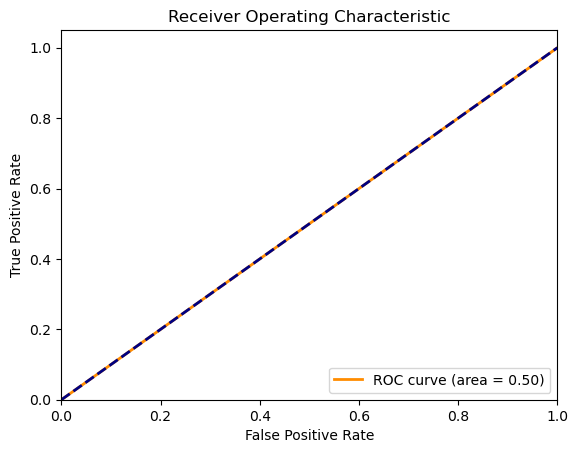

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


In [31]:
# Features and Output
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l1', solver = 'saga', max_iter = 10000, random_state = 42).fit(X_train, y_train)

# Get classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0.0))

# AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print(clf.coef_)

In [32]:
# Features and Output
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Get list of input features
features = X.columns
kept_features = []

# Filter for features that have some predictive power (i.e. AUC > 0.5)
for feature in features:
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X[[feature]], y, test_size=0.2, random_state=42)

    # Train model
    clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l1', solver = 'saga', max_iter = 10000, random_state = 42).fit(X_train, y_train)

    # Determine AUC and keep features with AUC > 0.5
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    if roc_auc > 0.5:
        kept_features.append(feature)
        
# Print results
print(kept_features)
    


['d_PLATELET_CNT']


## Recipient and Donor and Operation

### Data Preprocessing

In [33]:
# Load in dataframe
df = pd.read_csv("/Users/stevenswee/Desktop/BE M227/Processed_Data/encoded_recipient_donor_op_df.csv")

# Get all but first column
df = df.iloc[:, 1:]

### Model (All Features)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       348
           1       0.00      0.00      0.00       123

    accuracy                           0.74       471
   macro avg       0.37      0.50      0.42       471
weighted avg       0.55      0.74      0.63       471



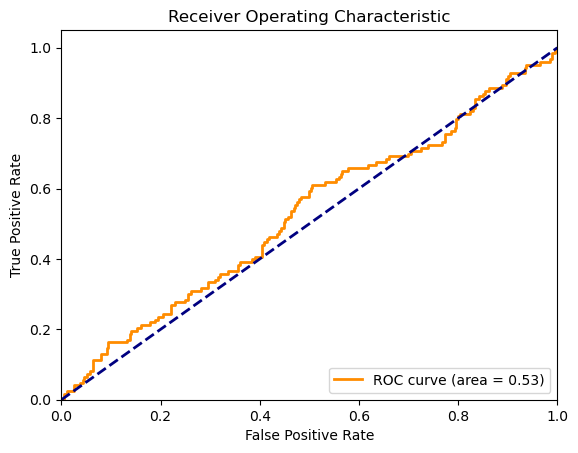

In [34]:
# Features and Output
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l1', solver = 'saga', max_iter = 10000, random_state = 42).fit(X_train, y_train)

# Get classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0.0))

# AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [35]:
# Filter out features with nonzero coefficients
result = [features for coefficients, features in zip(clf.coef_[0], X_test.columns) if coefficients != 0]
# print(result)

In [36]:
# Features and Output
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Get list of input features
features = X.columns
kept_features = []

# Filter for features that have some predictive power (i.e. AUC > 0.5)
for feature in features:
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X[[feature]], y, test_size=0.2, random_state=42)

    # Train model
    clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l1', solver = 'saga', max_iter = 10000, random_state = 42).fit(X_train, y_train)

    # Determine AUC and keep features with AUC > 0.5
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    if roc_auc > 0.5:
        kept_features.append(feature)
        
# Print results
print(kept_features)
    


['d_PLATELET_CNT']


## Recipient, Donor, Operation, Complications

### Data Preprocessing

In [50]:
# Load in dataframe
df = pd.read_csv("/Users/stevenswee/Desktop/BE M227/Processed_Data/encoded_recipient_donor_op_comp_df.csv")

# Get all but first column
df = df.iloc[:, 1:]

              precision    recall  f1-score   support

           0       0.74      0.98      0.84       348
           1       0.14      0.01      0.02       123

    accuracy                           0.73       471
   macro avg       0.44      0.50      0.43       471
weighted avg       0.58      0.73      0.63       471



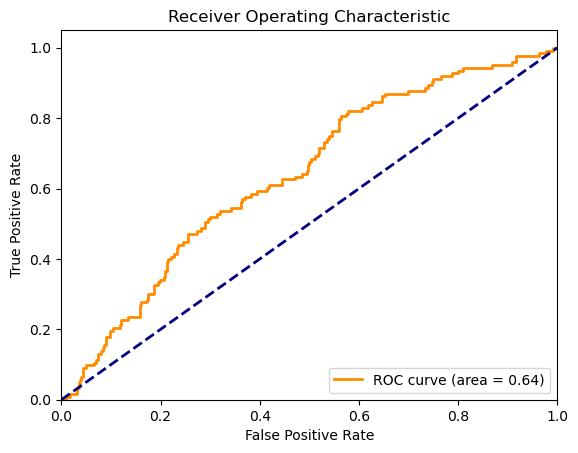

In [38]:
# Features and Output
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l1', solver = 'saga', max_iter = 10000, random_state = 42).fit(X_train, y_train)

# Get classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0.0))

# AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [39]:
# Filter out features with nonzero coefficients
result = [features for coefficients, features in zip(clf.coef_[0], X_test.columns) if coefficients != 0]
# result

In [54]:
# Features and Output
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Get list of input features
features = X.columns
kept_features = []

# Filter for features that have some predictive power (i.e. AUC > 0.5)
for feature in features:
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X[[feature]], y, test_size=0.2, random_state=42)

    # Train model
    clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'elasticnet', solver = 'saga', n_jobs = -1, max_iter = 10000, random_state = 42, l1_ratios = [0, 0.25, 0.5, 0.75, 1]).fit(X_train, y_train)

    # Determine AUC and keep features with AUC > 0.5
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    if roc_auc > 0.5:
        kept_features.append(feature)
        
# Print results
print(kept_features)

['GENDER', 'ETHNICITY_RACE_Asian', 'ETHNICITY_RACE_Black or African American', 'ETHNICITY_RACE_Unknown/Not Reported', 'AGE_TSRF', 'BMI_TSRF', 'BMIcat_Morbidly Obese', 'BMIcat_Normal', 'BMIcat_Obese', 'BMIcat_Overweight', 'EMPLOYMENT_STATUS', 'HIGHEST_ED_LEVEL_Attended college/Technical school', 'HIGHEST_ED_LEVEL_Grade school (0-8)', 'HIGHEST_ED_LEVEL_High school (9-12) or GED', 'PRIMARY_INSURANCE_Government/Other', 'PRIMARY_INSURANCE_Private', 'PRIMARY_INSURANCE_Unknown', 'PRIOR_TRANSPLANT', 'APT_AC', 'CARDIAC_REVASC', 'DIABETES_REC', 'DIALYSIS_Hemodialysis', 'DIALYSIS_Not on dialysis', 'HEALTH_STATUS', 'HSTE_TYPES_YN', 'HTN_LIV', 'LVEF_REC', 'PKD', 'BLOOD_TYPE_A', 'BLOOD_TYPE_AB', 'BLOOD_TYPE_O', 'CPRA', 'CREATININE', 'EBV_RESULTS', 'HCV_ANTIBODY_RESULTS', 'HEMOGLOBIN', 'HIV_RESULTS', 'INR', 'PLATELET_CNT', 'd_GENDER', 'd_ETHNICITY_RACE_Black or African American', 'd_ETHNICITY_RACE_Hispanic/Latino', 'd_ETHNICITY_RACE_Native Hawaiian or Other Pacific Islander', 'd_ETHNICITY_RACE_White'

In [65]:
len(kept_features)

88

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       348
           1       0.00      0.00      0.00       123

    accuracy                           0.74       471
   macro avg       0.37      0.50      0.42       471
weighted avg       0.55      0.74      0.63       471



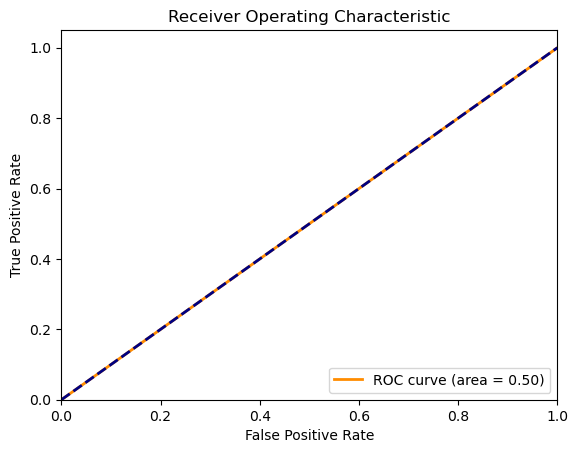

In [64]:
features = ['GENDER',
 'AGE_TSRF',
 'BMI_TSRF']

X = X[features]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l1', solver = 'saga', max_iter = 10000, n_jobs = -1, random_state = 42).fit(X_train, y_train)

# Get classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0.0))

# AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Remove Continuous Variables

In [66]:
# Select columns to remove
cols_to_remove = ['BMI_TSRF', 'KDPI']

# Load in dataframe
df = pd.read_csv("/Users/stevenswee/Desktop/BE M227/Processed_Data/encoded_recipient_donor_op_comp_df.csv")

# Get all but first column
df = df.iloc[:, 1:]

# Filter out columns
df = df.drop(columns = cols_to_remove)

              precision    recall  f1-score   support

           0       0.74      0.98      0.84       348
           1       0.14      0.01      0.02       123

    accuracy                           0.73       471
   macro avg       0.44      0.50      0.43       471
weighted avg       0.58      0.73      0.63       471



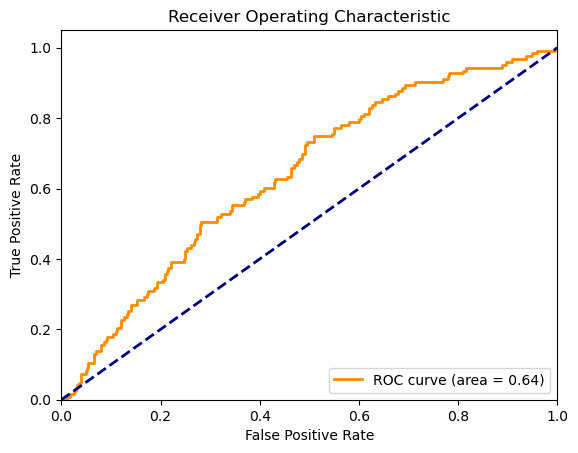

In [68]:
# Features and Output
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l2', solver = 'saga', max_iter = 10000, n_jobs = -1, random_state = 42).fit(X_train, y_train)

# Get classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0.0))

# AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [43]:
# Filter out features with nonzero coefficients
result_new = [features for coefficients, features in zip(clf.coef_[0], X_test.columns) if coefficients != 0]
# result_new

In [44]:
# Determine which features are different
difference = list(set(result) - set(result_new))
print(difference)

['dd_HEP_C_ANTIBODY_STATUS', 'BMI_TSRF', 'KDPI', 'd_ETHNICITY_RACE_Black or African American', 'd_CREATININE', 'd_ETHNICITY_RACE_White', 'HIGHEST_ED_LEVEL_Attended college/Technical school']
